# Number of parameters v.s. Generalization

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)


In [3]:
class M1(nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        self.fc1 = nn.Linear(784, 60) 
        self.fc2 = nn.Linear(60, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M2(nn.Module):
    def __init__(self):
        super(M2, self).__init__()
        self.fc1 = nn.Linear(784, 120)  
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M3(nn.Module):
    def __init__(self):
        super(M3, self).__init__()
        self.fc1 = nn.Linear(784, 250)  
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M4(nn.Module):
    def __init__(self):
        super(M4, self).__init__()
        self.fc1 = nn.Linear(784, 500)  
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M5(nn.Module):
    def __init__(self):
        super(M5, self).__init__()
        self.fc1 = nn.Linear(784, 570)  
        self.fc2 = nn.Linear(570, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M6(nn.Module):
    def __init__(self):
        super(M6, self).__init__()
        self.fc1 = nn.Linear(784, 720)  
        self.fc2 = nn.Linear(720, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M7(nn.Module):
    def __init__(self):
        super(M7, self).__init__()
        self.fc1 = nn.Linear(784, 1050)  
        self.fc2 = nn.Linear(1050, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M8(nn.Module):
    def __init__(self):
        super(M8, self).__init__()
        self.fc1 = nn.Linear(784, 1200)  
        self.fc2 = nn.Linear(1200, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M9(nn.Module):
    def __init__(self):
        super(M9, self).__init__()
        self.fc1 = nn.Linear(784, 1550)  
        self.fc2 = nn.Linear(1550, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class M10(nn.Module):
    def __init__(self):
        super(M10, self).__init__()
        self.fc1 = nn.Linear(784, 1990)  
        self.fc2 = nn.Linear(1990, 10)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [4]:
def trainFunc(model, optimizer, loss_func, num_epochs):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        acc = 100 * correct / total
        train_losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {acc:.2f}%")
    return avg_loss, acc


In [5]:
def testFunc(model, loss_func):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = loss_func(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_acc = 100 * correct / total
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    return avg_test_loss, test_acc


In [6]:
modelArr = [M1, M2, M3, M4, M5, M6, M7, M8, M9, M10]

num_epochs = 10
learning_rate = 0.001

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
model_parameters = []

for i, model_class in enumerate(modelArr):
    torch.manual_seed(i + 1)  
    model = model_class()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    total_params = sum(p.numel() for p in model.parameters())
    model_parameters.append(total_params)

    print(f"\nTraining Model {model_class.__name__} with {total_params} parameters")
    train_loss, train_acc = trainFunc(model, optimizer, loss_func, num_epochs)
    test_loss, test_acc = testFunc(model, loss_func)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)




Training Model M1 with 47710 parameters
Epoch [1/10], Loss: 0.9366, Accuracy: 79.06%
Epoch [2/10], Loss: 0.3549, Accuracy: 90.30%
Epoch [3/10], Loss: 0.2913, Accuracy: 91.92%
Epoch [4/10], Loss: 0.2585, Accuracy: 92.78%
Epoch [5/10], Loss: 0.2337, Accuracy: 93.47%
Epoch [6/10], Loss: 0.2133, Accuracy: 94.08%
Epoch [7/10], Loss: 0.1945, Accuracy: 94.58%
Epoch [8/10], Loss: 0.1779, Accuracy: 94.98%
Epoch [9/10], Loss: 0.1637, Accuracy: 95.42%
Epoch [10/10], Loss: 0.1518, Accuracy: 95.72%
Test Loss: 0.1568, Test Accuracy: 95.58%

Training Model M2 with 95410 parameters
Epoch [1/10], Loss: 0.7578, Accuracy: 82.22%
Epoch [2/10], Loss: 0.3035, Accuracy: 91.52%
Epoch [3/10], Loss: 0.2453, Accuracy: 93.20%
Epoch [4/10], Loss: 0.2082, Accuracy: 94.13%
Epoch [5/10], Loss: 0.1802, Accuracy: 94.93%
Epoch [6/10], Loss: 0.1574, Accuracy: 95.52%
Epoch [7/10], Loss: 0.1394, Accuracy: 96.01%
Epoch [8/10], Loss: 0.1253, Accuracy: 96.44%
Epoch [9/10], Loss: 0.1129, Accuracy: 96.72%
Epoch [10/10], Loss: 

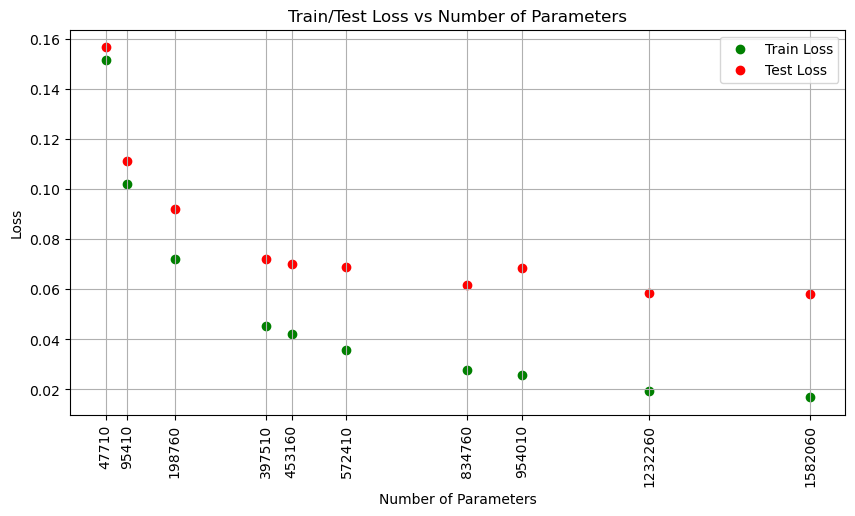

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(model_parameters, train_losses, color='green', label='Train Loss')
plt.scatter(model_parameters, test_losses, color='red', label='Test Loss')
plt.xticks(model_parameters, model_parameters, rotation=90)
plt.legend()
plt.title('Train/Test Loss vs Number of Parameters')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


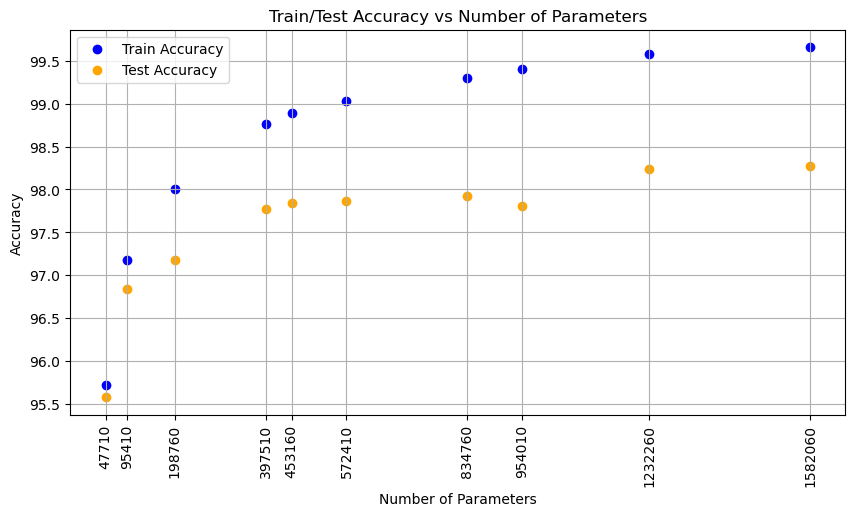

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(model_parameters, train_accuracies, color='blue', label='Train Accuracy')
plt.scatter(model_parameters, test_accuracies, color='orange', label='Test Accuracy')
plt.xticks(model_parameters, model_parameters, rotation=90)
plt.legend()
plt.title('Train/Test Accuracy vs Number of Parameters')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()